---
title: "practice"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
sns.set(style="ticks", font_scale=1.1)

%matplotlib widget

In [3]:
df = pd.read_csv("grapevine_E.csv",
                 index_col='date', parse_dates=True)
df

,E
date,
2023-07-10 10:37:30,0.004116
2023-07-10 10:38:30,0.004012
2023-07-10 10:39:30,0.003694
2023-07-10 10:40:30,0.003506
2023-07-10 10:41:30,0.003361
...,...
2023-07-13 20:14:23,0.000059
2023-07-13 20:15:23,0.000069
2023-07-13 20:16:23,0.000061


In [4]:
start = '2023-07-12'
end = '2023-07-13'
df = df[start:end]

/var/folders/kv/9cqw3y_s6c75xmgqm9n0t5d40000gn/T/ipykernel_45965/2155568388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['E'].loc[df['E']<4.5e-5] = np.nan
/var/folders/kv/9cqw3y_s6c75xmgqm9n0t5d40000gn/T/ipykernel_45965/2155568388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['E'].ffill(inplace=True)


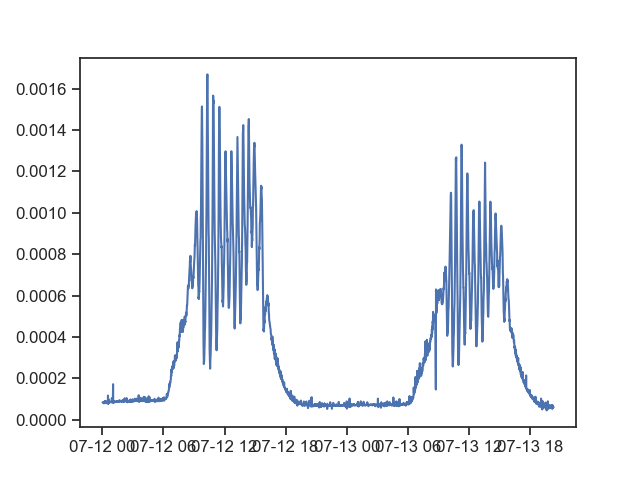

In [5]:
fig, ax = plt.subplots()
df['E'].loc[df['E']<4.5e-5] = np.nan
df['E'].ffill(inplace=True)
ax.plot(df['E'])

[Text(0.5, 0, 'Freq (Hz)'), Text(0, 0.5, 'FFT Amplitude |X(freq)|')]

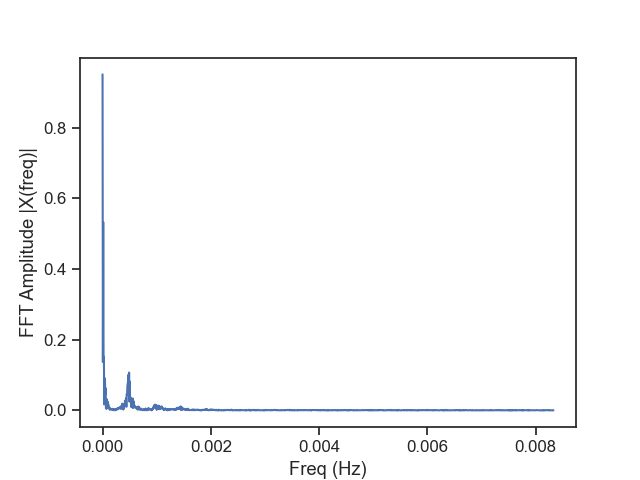

In [8]:
X = scipy.fft.fft(df['E'].values)
N = len(X)
n = np.arange(N)
# the basic time unit here is "second"
# measurements every 60 seconds
dt = 60  # seconds
freq = scipy.fft.fftfreq(N, d=dt)

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

fig, ax = plt.subplots()
ax.plot(f_oneside, np.abs(X[:n_oneside]))
ax.set(xlabel='Freq (Hz)',
       ylabel='FFT Amplitude |X(freq)|')

/var/folders/kv/9cqw3y_s6c75xmgqm9n0t5d40000gn/T/ipykernel_45965/2126760064.py:2: RuntimeWarning: divide by zero encountered in divide
  t_h = 1/f_oneside / 60


[(0.0, 100.0)]

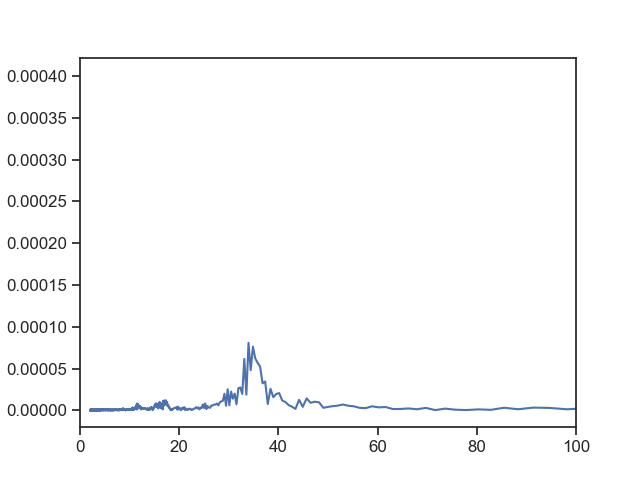

In [9]:
# convert frequency to minute
t_h = 1/f_oneside / 60
fig, ax = plt.subplots()
ax.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
ax.set(xlim=[0, 100])
# plt.xticks([12, 24, 84, 168])
# plt.xlim(0, 200)
# plt.xlabel('Period ($hour$)')
# plt.show()

In [11]:
original = df['E'].values
# FFT the signal
sig_fft = scipy.fft.fft(original)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()
# define the cut-off frequency
# exclude oscillations whose period is shorter than 10 minutes
cut_off = 1 / (10*60)

# low-pass filter by assigning zeros to the 
# FFT amplitudes where the absolute 
# frequencies higher than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0

# get the filtered signal in time domain
filtered = scipy.fft.ifft(sig_fft_filtered)

/Users/yairmau/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


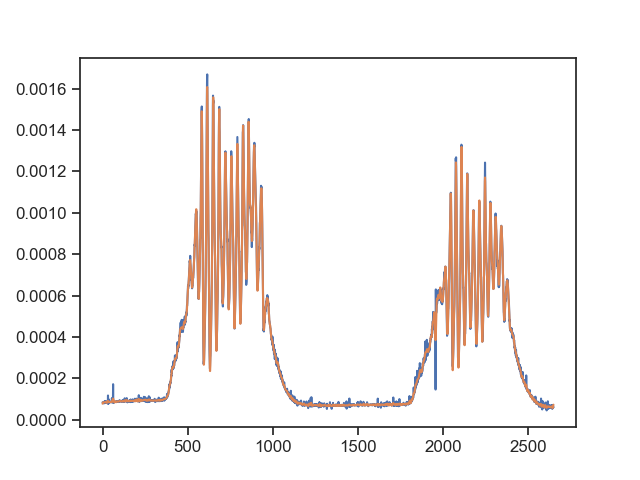

In [12]:
fig, ax = plt.subplots()
ax.plot(original)
ax.plot(filtered)